In [1]:
from tensorflow.keras import layers, models, backend, utils, metrics, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from wand.image import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
os.mkdir('./output')
os.mkdir('./output/valid')
os.mkdir('./output/valid/fake')
os.mkdir('./output/valid/real')
os.mkdir('./output/train')
os.mkdir('./output/train/fake')
os.mkdir('./output/train/real')
os.mkdir('./output/test')
os.mkdir('./output/test/fake')
os.mkdir('./output/test/real')

# import shutil

# dir_path = './output'

# try:
#     shutil.rmtree(dir_path)
# except OSError as e:
#     print("Error: %s : %s" % (dir_path, e.strerror))

In [3]:

# img = mpimg.imread('./output/valid/fake/WCH829WC6Y.jpg')
# imgplot = plt.imshow(img)
# plt.show()

In [4]:
DIR_PREFIX='../input/evendata/input/real_vs_fake/real-vs-fake/'

def convert_to_edge(dir_name='train'):
    i = 0
    for filename in os.listdir(DIR_PREFIX+dir_name):
        f = os.path.join(DIR_PREFIX+dir_name, filename)
        # checking if it is a file
        if os.path.isdir(f):
            convert_to_edge(dir_name+'/'+filename)
        else:
            i = i+1
            with Image(filename = f) as image:
                # Clone the image in order to process
                with image.clone() as edge:
                    edge.transform_colorspace('gray')
                    # Invoke edge function
                    edge.edge(1.5)
                    # Save the image
                    edge.save(filename =f.replace(DIR_PREFIX,'./output/'))
    
convert_to_edge('valid')
convert_to_edge('test')
convert_to_edge('train')

In [5]:
base_path = '../input/evendata/input/real_vs_fake/real-vs-fake/'
image_gen = ImageDataGenerator()

test_flow = image_gen.flow_from_directory(
    base_path + 'test/',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

train_flow = image_gen.flow_from_directory(
    base_path + 'train/',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

valid_flow = image_gen.flow_from_directory(
    base_path + 'valid/',
    target_size=(256, 256),
    batch_size=64,
    class_mode='binary'
)

train_flow.class_indices

Found 3587 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [6]:
model = models.Sequential()

model.add(
    layers.Conv2D(32, (3, 3),activation='relu', input_shape=(256, 256, 3))
)

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, kernel_regularizer=regularizers.l2(0.01), activation='linear'))
model.summary()

model.compile(
    optimizer = 'adam', 
    loss = 'hinge', 
    metrics = [
        'accuracy'
    ]
)

2022-06-17 08:50:15.916458: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 08:50:16.026150: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 08:50:16.026956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-17 08:50:16.028281: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 256)       2

In [7]:
train_steps = 8000//64
valid_steps = 4000//64

hist = model.fit(
    train_flow,
    epochs=10,
    validation_data=valid_flow
)

2022-06-17 08:50:19.058581: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-06-17 08:50:20.759836: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


125/125 [==============================] - 46s 305ms/step - loss: 2.5532 - accuracy: 0.5203 - val_loss: 0.9927 - val_accuracy: 0.5015
Epoch 2/10
125/125 [==============================] - 38s 301ms/step - loss: 0.9190 - accuracy: 0.5544 - val_loss: 0.9003 - val_accuracy: 0.5640
Epoch 3/10
125/125 [==============================] - 38s 304ms/step - loss: 0.8223 - accuracy: 0.6097 - val_loss: 0.8055 - val_accuracy: 0.6210
Epoch 4/10
125/125 [==============================] - 39s 309ms/step - loss: 0.7061 - accuracy: 0.6820 - val_loss: 0.7620 - val_accuracy: 0.6700
Epoch 5/10
125/125 [==============================] - 39s 309ms/step - loss: 0.6513 - accuracy: 0.7048 - val_loss: 0.7020 - val_accuracy: 0.6785
Epoch 6/10
125/125 [==============================] - 39s 311ms/step - loss: 0.5619 - accuracy: 0.7504 - val_loss: 0.6699 - val_accuracy: 0.6950
Epoch 7/10
125/125 [==============================] - 38s 305ms/step - loss: 0.4904 - accuracy: 0.7862 - val_loss: 0.6642 - val_accuracy: 0.7

In [8]:
from sklearn import metrics
import seaborn as sns


y_pred = model.predict(test_flow)
y_test = test_flow.classes

# plt.figure(figsize = (8,5))
# sns.heatmap(metrics.confusion_matrix(y_test, y_pred.round()), annot = True,fmt="d",cmap = "Blues")
# plt.show()

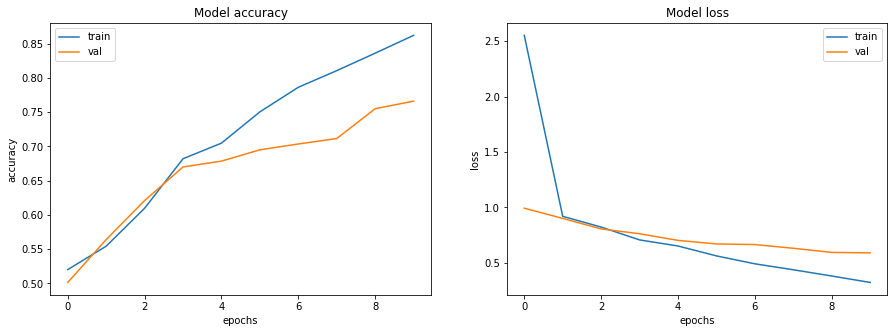

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.ravel()

for i, met in enumerate([ "accuracy", "loss"]):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history["val_" + met])
    ax[i].set_title("Model {}".format(met))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(met)
    ax[i].legend(["train", "val"])